In [ ]:
#| hide
import numpy as np
import matplotlib.pyplot as plt

from colortextpy import Color
from colortextpy import Fore, Back, Style, RESET_ALL, AnsiColor
from colortextpy import ColorStream, colorize
from colortextpy import Printer, colorprint

from nbdev import show_doc

import warnings
warnings.filterwarnings('ignore')

# colortextpy

> Colortextpy is a Python package for adding colors and styles to terminal output, allowing you to create more visually appealing and organized command-line applications. The full `colortextpy` documentation is available at  [https://susuky.github.io/colortextpy/](https://susuky.github.io/colortextpy/)

## Install

Tested on python 3.6-3.11, win11, win11 WSL2, Ubuntu

It doesn't support win32

```sh
pip install colortextpy
```

## Usage

### Color printer

In [ ]:
#| output: false
from colortextpy import Printer, colorprint

Printer.blue_print('blue')
Printer.blue_print('blue', bold=True)

colorprint('default')
colorprint('#ff3567', color='#ff3567')
colorprint('#123456', color=Fore['#123456'])
colorprint(4, color=4)
colorprint(137, color=Fore['137'])
colorprint('(50, 234, 33)', color=(50, 234, 33))
colorprint('(50, 24, 133)', color='(50, 24, 133)')
colorprint('dark_green', color=Fore.dark_green)

colorprint('violet', background='violet', bold=False)
colorprint('violet', background='violet', bold=True)
colorprint('violet', color=Fore.green, background='violet', bold=True)

![](images/index-0.png)

Use `Printer.available` to see other color printers 

### `Fore`, `Back`, `Style`

In [ ]:
from colortextpy import Fore, Back, Style, AnsiColor, RESET_ALL

Fore, Back, Style

(<AnsiColor: 'FORE'>, <AnsiColor: 'BACK'>, <AnsiColor: 'STYLE'>)

You could use `Style` to get style ansi escape code:

In [ ]:
#| output: false
print(f'{Style["bold"]+Style.underline}bold + underline{Style.end}')
Style['bold'], Style.underline

![](images/index-1.png)

Other style see `Style.availble`, but __bold__, __underline__ would be the most used

You could use `Fore` and `Back` to get the text foreground and background ansi escape code:

In [ ]:
Fore['red'], Fore.black, Back.chocolate, Back['hotpink']

('\x1b',
 '\x1b',
 '\x1b',
 '\x1b')

Both `Fore` and `Back` could also support __8-bits__, __hex__, __rgb__ color.

In [ ]:
Fore[50], Fore['#ffffff'], Fore['123, 45, 67']

('\x1b', '\x1b', '\x1b')

In [ ]:
Back['144'], Back['#123456'], Back['(55, 244, 31)']

('\x1b', '\x1b', '\x1b')

Here's demo of supported 8-bits colors:

In [ ]:
#| output: false
#| code-fold: true
for i in range(256):
    end = '\n' if (i+1)%8 == 0 else ' '*2
    print(f'{i:3}: {Back[i]}           {Back.reset}', end=end)

![](images/index-3.png)

Other available colors are in `Fore.availble` and `Back.available`

You could combine `Fore`, `Back`, `Style` to colorize your output:

In [ ]:
#| output: false
text = 'something123'
print(Fore[50] + text + Fore.reset)
print(Back['black'] + Fore.aliceblue + Style.underline + text)

![](images/index-2.png)

`colortextpy` also provides `AnsiColor` api to combine `Fore`, `Back` and `Style` together.

In [ ]:
show_doc(AnsiColor)

---

[source](https://github.com/susuky/colortextpy/blob/main/colortextpy/ansicolor.py#LNone){target="_blank" style="float:right; font-size:smaller"}

### AnsiColor

>      AnsiColor (fore:str=None, back:str=None, style:str=None)

Integrate with `Fore`, `Back`, `Style`.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| fore | str | None | Foreground color. Could be hex, rgb string or tuple, `Fore`, 8-bits color |
| back | str | None | Background color, Could be hex, rgb string or tuple, `Back`, 8-bits color |
| style | str | None | Text style. Seee `Style.available`. |

In [ ]:
#| output: false
ansi = AnsiColor(fore='#0c0caa', back='aliceblue', style='underline')
print(ansi.ansi_fmt + '123456789' + RESET_ALL)


ansi = AnsiColor(fore=Fore['123, 234, 56'], back=(20, 29, 12), style=('bold', 'underline'))
print(ansi.ansi_fmt + '123' + RESET_ALL)
ansi.fore, ansi.back, ansi.style, ansi.ansi_fmt

![](images/index-4.png)

Without setting any color, `AnsiColor` would give emtpy string:

In [ ]:
AnsiColor().ansi_fmt

''

### `ColorStream`

Enables context managers to work as decorators 
to colorize the `sys.stdout` or `sys.stderr`

Some usage:

```python
    with ColorStream(fore='red'):
        print('text')        

    @ColorStream(fore=Fore.dark_orange)
    def foo():
        print('FOO')
```

In [ ]:
#| output: false
with ColorStream(fore=Fore.dark_violet, autoreset=False):
    print('autoreset off, affect next text')
    with ColorStream(back=Back.light_green, style=(Style.underline, Style.bold)):
        print('add background, underline, bold and autoreset')
        with ColorStream(fore='red'):
            print('Due to autoreset above, It only have red color')
print('Already leave context, show default color')

![](images/index-5.png)

In [ ]:
#| output: false
@ColorStream(fore=Fore.dark_cyan)
def foo():
    print('dark_cyan')
    print('colortextpy')

foo()

![](images/index-6.png)

### `colorize`

you can add color tag. Start with \<tag> end with \</tag>.

Some usage:

In [ ]:
#| output: false
text = 'something'
text_w_tag = f'{text}-<fg red><bg #f0ffff>{text}</fg></bg>-{text}'
print(colorize(text_w_tag))

![](images/index-7.png)

And some other \<tag> complex uasge:

In [ ]:
#| code-fold: true
#| output: false
test_strings = ('one', 'two', 'three', 'four', 'five')
test_templates = [
    '{0}',
    '<blue>{0}</fg>',
    '<red>{0}</red>--<bg green>{1}</bg green>',
    '{0}--<red>{1}</red>--<fg red><bg green>{2}</bg>--{3}</fg>',
    '{0}--<50>{1}</fg>--<fg 155><bg 78>{2}</bg></fg>',
    '<bold>{0}--<fg 180, 46, 78>{1}</fg></bold>--<bg 152, 167, 52>{2}</bg>',
    '<underline>{0}--<180, 46, 78>{1}</fg>--<bold>{1}--<bg 152, 167, 52>{2}</underline>--{3}</bold>--{4}</bg>',
    '<bg #59FFAE>{0}--<#AAAA00>{1}--</bg>{2}</fg>--{3}',
]

for template in test_templates:
    print(colorize(template.format(*test_strings)))

![](images/index-8.png)

`colorize` also integrates with `AnsiColor`:

In [ ]:
#| output: false
print(colorize('something1', fore=5, back='#ffeeaa', style='bold'))
print(colorize('something2', fore='r', back='y', style='underline'))

![](images/index-9.png)

### `Color`

Some Constant of color with **hex**, **rgb**, **bgr** format

In [ ]:
Color.red.name, Color.red.hex, Color.red.rgb, Color['red']

('red', '#ff0000', (255, 0, 0), <Color.red>)

You could also pass the hex constant from `Color` into `matplotlib.pyplot`:

[<matplotlib.lines.Line2D>]

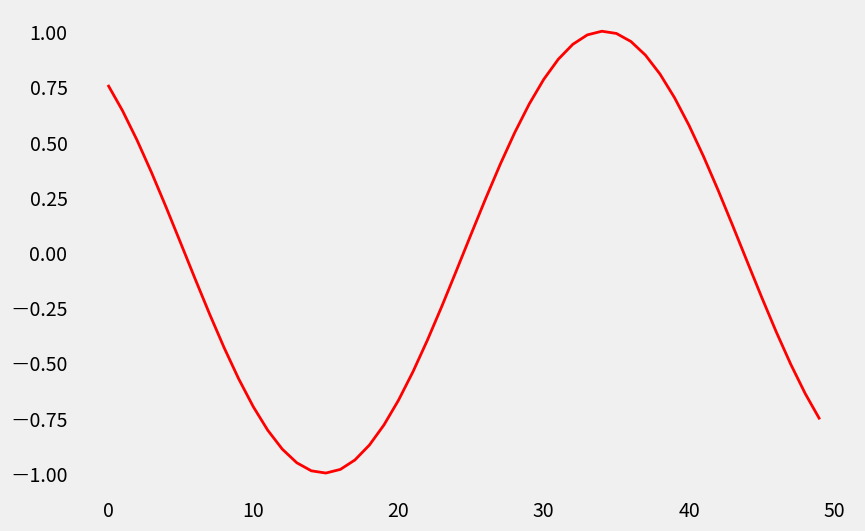

In [ ]:
plt.plot(np.sin(np.linspace(-4, 4, 50)), color=Color.red.hex)

Here are other colors in `Color.available` : 

![](images/index-10.png)